<a href="https://colab.research.google.com/github/Nemit-jindal/ML_Support_Vector_Machines/blob/main/Support_Vector_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [36]:
x

array([[ 0.22728563,  1.70734044],
       [ 1.55898124,  0.50184991],
       [-0.6123915 , -1.30219455],
       ...,
       [-0.84714053, -1.22491459],
       [-1.23978188,  2.60823046],
       [-0.50404367,  2.18076166]])

In [37]:
y

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [38]:
pd.DataFrame(x)[0]

,0
0,0.227286
1,1.558981
2,-0.612391
3,1.315664
4,1.356411
...,...
995,1.945328
996,1.035686
997,-0.847141
998,-1.239782


In [39]:
pd.DataFrame(x)[1]

,1
0,1.707340
1,0.501850
2,-1.302195
3,-2.124767
4,-1.030545
...,...
995,-0.110364
996,-0.273370
997,-1.224915
998,2.608230


In [40]:
y

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,

<Axes: xlabel='0', ylabel='1'>

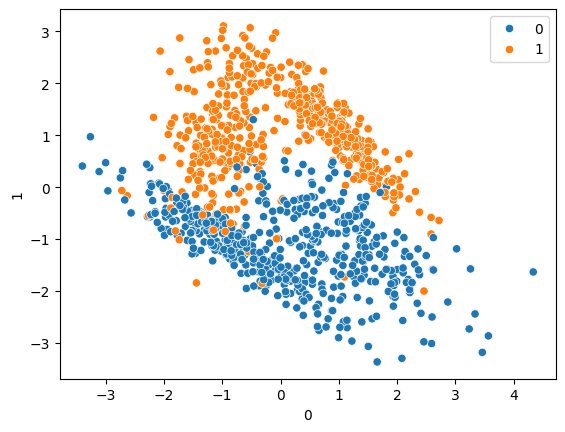

In [41]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [43]:
x_train.shape,x_test.shape

((700, 2), (300, 2))

In [44]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear")

In [45]:
classifier

SVC(kernel='linear')

In [46]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [47]:
classifier.coef_

array([[0.23818599, 1.88958959]])

In [48]:
y_pred=classifier.predict(x_test)

In [49]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       166
           1       0.88      0.85      0.87       134

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



In [51]:
print(confusion_matrix(y_test,y_pred))

[[151  15]
 [ 20 114]]


In [52]:
print(accuracy_score(y_test,y_pred))

0.8833333333333333


In [53]:
from sklearn.model_selection import GridSearchCV
params={'C':[1,2,3,4,5,10,20,50,100],
        'gamma':[0.2,1,0.4,0.001,0.003],
        'kernel':['linear']}

In [54]:
params

{'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
 'gamma': [0.2, 1, 0.4, 0.001, 0.003],
 'kernel': ['linear']}

In [55]:
grid=GridSearchCV(classifier,param_grid=params,cv=5,verbose=3)

In [56]:
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [57]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.979 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.936 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.879 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.921 total time=   0.0s
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.936 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.879 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.886 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.921 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.4, kernel=linear;, score=0.979 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.4, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 50, 100],
                         'gamma': [0.2, 1, 0.4, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [58]:
grid.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'linear'}

In [59]:
grid.best_score_

0.9199999999999999